# Lecture 6

Numerically, the tâtonnement algorithm simply requires the computation of $P\left(\nabla u\left(X\right) = y_{k}\right) $ for a set of prices $\left(v_{k}\right)$. Equivalently, we need to evaluate the measure under distribution $P$ of the cells $\mathcal{X}_{k}^{v}$. These cells are polyhedron, and they are described by
\begin{align*}
\mathcal{X}_{j}^{v}=\left\{  x\in\mathcal{X}:x^{\intercal}\left(  y_{j}%
-y_{k}\right)  \geq v_{j}-v_{k},~\forall k\right\} 
\end{align*}
as intersections of half spaces. There are standard computational geometry routines that compute the Euclidian volume of such polyhedras. Hence, when $P$ is the Lebesgue measure, the problem can be addressed using existing tools. When $P$ is not the Lebesgue measure, there are no off-the-shelves tools to compute the measure of polyhedras. In that case, simulation methods should be used.

The R package `transport` provides useful resources for numerical optimal transportation, in particular power diagrams. This notebook provides an example of equilibrium price determination, when $P$ is the uniform over $[0,1]^2$. Initially the prices ˜$\tilde{v}$ are set to zero, and the initial demand configuration is a Voronoi diagram.

In [20]:
library('magick') # For plotting animations
library('transport')
library('geometry')

SEED = 777
MAX_ITER = 1000
PREC = 1E-2

set.seed(SEED)
nCells = 10

y1 = runif(nCells)
y2 = runif(nCells)
vtilde = rep(0,nCells)
q = rep(1/nCells,nCells)
demand = rep(0,nCells)
eps = 0.1 #tuning parameter

The prices adjust over time so that the area of the demand cells adjust to supply. Here, `y1`, `y2` and `vtilde` are vectors of size $10$ which represent respectively the first and second coordinates, and the prices of each of the ten fountains. The instruction

In [21]:
pwd = power_diagram(y1,y2,vtilde,rect=c(0,1,0,1))

Computes the power diagram, which is a list of cells, represented by their extreme points, while

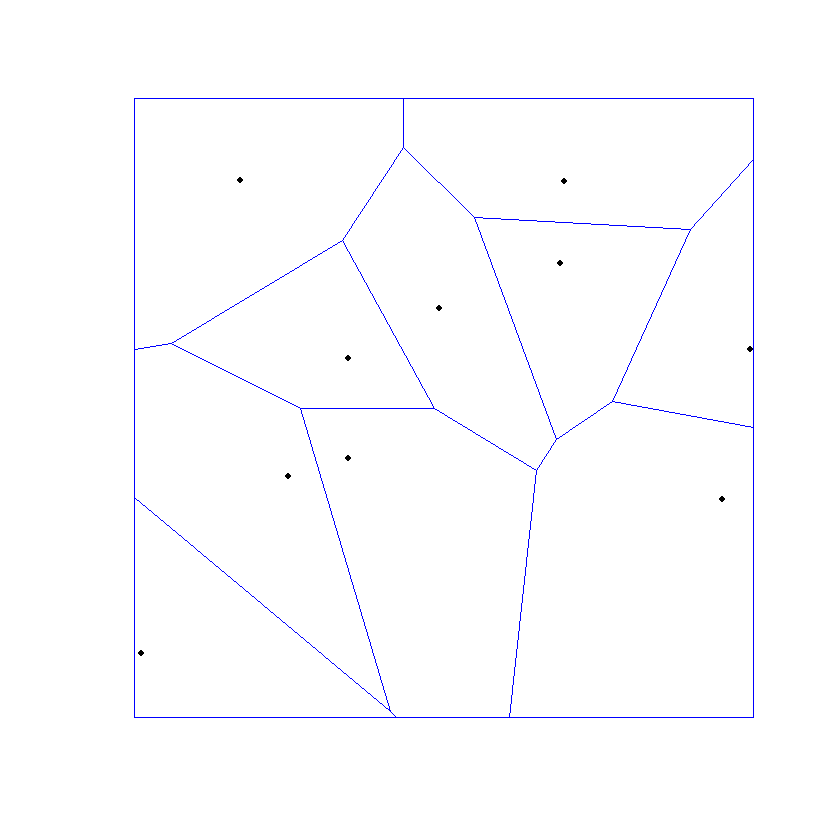

In [22]:
plot(pwd,weights=FALSE)

plots the power diagram (if `vtilde=0` this is the Voronoi diagram).

For each cell j, set `cellj=pwd$cells[[j]]`, and demand is computedusing

In [23]:
for (j in 1:nCells)
{
  cellj =pwd$cells[[j]]
  demand[j] = polyarea(cellj[,1],cellj[,2])
}

where `polyarea`, from the ‘geometry’ package, computes the area of a cell. Finally, the prices are adjusted using:

In [24]:
vtilde = vtilde - eps * (demand - q)

where eps is a tuning parameter which controls the speed of adjustment of the process, and the configuration converges to equilibrium.

In [25]:
# Loop it

# create canvas
frames = image_graph(width = 600, height = 600, res = 150)

t = 1
cont = TRUE
while ((cont==TRUE) && (t<MAX_ITER))
{
  if(t %% 10==0) {
    # Print on the screen some message
    cat(paste0("iteration: ", t, "\n"))
  }
  for (j in 1:nCells)
  {
    cellj = pwd$cells[[j]]
    demand[j] = polyarea(cellj[,1],cellj[,2])
  }
  if (max(abs(demand-q))<PREC/nCells) 
  {
      cont=FALSE
  } 
  else 
  {
    t=t+1
    vtilde = vtilde - 0.1 * (demand - q)
    pwd = power_diagram(y1,y2,vtilde,rect=c(0,1,0,1))
    plot(pwd,weights=FALSE)
  }
}

# animate
animation = image_animate(frames, 10)
image_write(animation, "powerdiagram.gif")
animation

#done with plotting
dev.off()

iteration: 10
iteration: 20
iteration: 30
iteration: 40
iteration: 50


<img src="data:image/gif;base64,R0lGODlhWAJYAvYAAAAAAAsLCxAQEBkZGSMjIywsLDMzMz09PQAASCMja0JCQkxMTFJSUltb
W2NjY2tra3R0dHx8fEBAiEhIkFtbo2FhqQAA/wsL/xQU/xsb/yMj/ysr/zMz/zs7/3x8xERE
/0xM/1RU/1xc/2Nj/2xs/3R0/3x8/4KCgoyMjJSUlJ2dnaOjo62trbS0tL29vYuL04SE/4uL
/5SU/5ub/62t9aOj/6ys/7e3/7u7/8TExMvLy9PT09zc3MPD/8zM/9TU/9zc/+Pj4+vr6+Pj
/+zs//Pz8/T0/////wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
AAAAAAAAAAAAAAAAAAAAAAAAACH5BAQKAAAAIf8LTkVUU0NBUEUyLjADAQAAACwAAAAAWAJY
AgAH/oBHgoOEhYaHiImKi4yNjo+QkZKTlJWWl5iZmpucnZ6foKGio6SlpqeoqaqrrK2ur7Cx
srO0tba3uLm6u7y9vr/AwcLDxMXGx8jJysvMzc7P0NHS09TV1tfY2drb3N3e3+Dh4uPk5ebn
6Onq6+zt7u/w8fLz9PX29/j5+vv8/f7/AAMKHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq
3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMq
Xcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rdu3/nDjyp1Lt67du3jz
6t3Lt6/fv4ADCx5MuLDhw4gTK17MuLHjx5AjS55MubLly5gza97MubPnz6BDix5NurTp06hT
q17NurXr17Bjy55Nu7bt27hz697Nu7fv38CDCx9OvLjx48iTK1/OvLnz59CjS59Ovbr169iz
a9/Ovbv37+DDix9Pvrz58+jTq1/Pvr379/Djy59Pv779+/jz69/Pv7///wC+AoMFBBZo4IEI
Jqjgggw26OCDEEYooYEXTGjhhRhmqOGGHGIIQ2Q3WADDDSSWaOKJKKao4oostujiizDGKGMM
FnAg44045qjjjjz26COJA94AogVCHoSDBSDY/hRikY8tiVCISdbkJGRTGnRklDRV6ZiWBEGp
JJFDMlmQl1KCSaWZBpGZJZpbstklkl+K2RiXA6k5E52L4RmQnTLpmZif/4QYQpxhPglnmXIy
Bqg/ghJ6ZqICNYpooQfZYMGgkz5qKKZrQqrYov1I2imlBlnK6Z1uKpqqQJaK4GiTqwZk6qtt
egoQCBZcQOucsf5DRK4WdJAprLb684EFH1QoLKrFHgaqPiFaYAQRFXLALKkDVWiDINTW2Gev
iD2LTwjBEkIEBhZsEJMIFoyALUBHWkBEIeem+1K0JLz7T4UyHFKvuiz1UGCzholbzwj2ImIE
uhqsBASB5BJcmMHz/vhA4BCKGJGBBRoYgVK3IlAcmMjxbPzhIhpzfNLC5ZL8l8vumGBBBo6k
nIHHJGmQMMx98bzOwxb88IjNOIfUwcyD+LyX0unoXIIkOt8cErkXzCsI03lhbQ6NGFASddEc
kXAxIVrfVfY4v1rgQyU6YwB2RgOqXcjZddEdDgcWuGpJ21ZnVAOBido9l+CWFBGEMTPkmskG
FmDQt0XRznAI4XFRLskOAQCg+Qlv92IE4Jrg7fgvQUBAwAIqTPMDgScbYvlbrz+Sg+a0A2CA
MEdjmQneVfeiQu0AECAENEMQmC8isbeVPCNGAE/7CsBYKm0nvD9+Cw/OA8DAM93q7jq4/s6C
bwr22R8AjLafHH0Bxrk4kD0Ahzez8bKJLL+W/Yq08D4Av+BKvyfqY98tBPA+FzSDcQ1bBP7S
skBEBOF9C/CFwOQlCvUBARcFeJ8OmHEstzGigWcB4SEGkD0D9qJCkhvFsS5wQVuc4H1FWAa7
1tcIEZbFhoUgX+0a4AuEAYwUK2whLYqQvdQpQ2YWEKICxTcxJppCCArQXABY4AuLWUCApMBV
Em0RhAzSLgXLkAGBevAIHI7FjMhAV+tMoUWh2YIHLMjB8JQhvW2V0YmDQaMxSqAyVZAraASZ
YL8goUewFHIYQFMiKv7oRoCszgJPi8QhvTLJYDjNFeyS2z+G/lAhvUkSj4Kp5C+4BotMrq0f
LPsAJUS5FVbyIm2nfAXCLEBGfujsh5JwZVZ0qQvGuUsWI6gQhTCgAQ58IAQkgIEMbIADHwCB
CJ0bB95oVgleXsWat0icrmhxgW4K00IXIKYxkalMZv7gmdF8Bq4ukE5HYLMq76TF50BZCoFR
8wjTAsIPemCDGcCABCIAAQc0gIFvgpOYGzhmMpfZTHQOQ2xXvEQ8pzJRWeTuFhXCIiTyuc9+
/lMEHxhoQQ0qoXBqYAMdICdDnUkE660ibo2sJj0BU1FYWIqdt0DY8UgxrSF01J8ADakGMkDS
kiJUoSZYqUM5kTgL4CATNYVKVF2B/r5bPGybtujpTz8qUIJ2E0MmTSgyk8pMlrbzCNGqgSam
6hS2rsJ/uthYLY+hVX76swQBFWlRIxTODIzzWBaIwSbcyhTCoiJeLqWFGL1njbp6FK9CJeqC
KsRYSxhWKZc1BQp3Mc921HVAWF3rTF82Wm0gzFq8wJta4cG4FA62tD2D7TWsqFFchCiB7gCa
JzKLFN6KQo2/IFBi0YErE+xWtktD7jRYds9esMu4niXQWVep3KxVFxpiJBAuebG60KpDbKd6
rcQI41tO+GBjSCJQLHuBrpimY2zHHW8er7sMI/wRA2ujEW57MaDwnkOMqI2vvryR3cASokLy
hUXa2FGh/vVyorxFgXAlfqAzZL3NUl37BePsiI4QNbcTEh5KiCNhhExiYK6F2JhreWGpAJ9D
ZxwWsKa80VQRKUJg3t2FcNHRXVGMOCg/ZgSFCfSB4RICb9DtBa4Ee46jrVHGxNpGiQl0YkcA
zci1sFiGy7FgH9PXLkFGxAyEmWRH4MqTvKiQe8PBrl+GIsw+gTMhgFDhDmAZEWmrLS5khuZw
zPPOmJAzTwR9BBM/lRIIU2UvipfjbwxI0V5O8Mi+nIu/EajMlCDQmnGhM0lPQ82kILROwkxn
Atk5EwPabqXLJY6/7ffNlKZLkGeJAU8rAsG+kK44NmbrXMZ6cL+ORQ2EGUlO/vxty7s41iBF
EYQWRCAHMbwFjk0h6pxIGAiMC5aeM6HiXhzpw55IAfBMWAu8LXsU1cYJhGd5gV474kiNxmhE
QcGC7MVvFsWzwCnSfRPf2oDYpWDck3Ehtp12onnZU0AtyFXsUAe7cg9HxRCyzYFte+KR040F
o0HxwPfJU9fUjjjsRF4KiLY7Fcdyc1xp+YmOZ48WfKwsrN3NF8L+23irSBugYSFGSHMC4c67
3SzgG3KaJ9forRgC3mpkcVIkmhed/QQKsreDWSTOxaXg9658wcdcxXgV89x0LY62Wk+4r3ZG
lAW6UJx1kivP7Q8WpsFdMSCs3+K2ochBBBSQAh7Q/sLDqtD6sHihdO0q8hUVOrQudowNnZV9
33C/X+Qv0fULPF4WiQO3LZ6LjR4HfvIMBP0kbiBMldcCXZe3xVWxcSxMF33A+D5aug7/d8Xt
Al0OjkaXP4906/YeFEi0fC8Yx+Rc9NcaCOsz5H9vNtHXEF3t+gXGdbH7aTCe97BvBRFkrwHa
6+JYc7fFhqkxoP+lQvCjmgUSLbDiX+R7561oMTUa3Ar0XysWOIC+8oHBLpkPnYLRYCmvdn7O
ZxZotH0EogFi9wvz5H2yQC4Dxw

   format width height colorspace matte filesize density
1     gif   600    600       sRGB  TRUE        0   72x72
2     gif   600    600       sRGB  TRUE        0   72x72
3     gif   600    600       sRGB  TRUE        0   72x72
4     gif   600    600       sRGB  TRUE        0   72x72
5     gif   600    600       sRGB  TRUE        0   72x72
6     gif   600    600       sRGB  TRUE        0   72x72
7     gif   600    600       sRGB  TRUE        0   72x72
8     gif   600    600       sRGB  TRUE        0   72x72
9     gif   600    600       sRGB  TRUE        0   72x72
10    gif   600    600       sRGB  TRUE        0   72x72
11    gif   600    600       sRGB  TRUE        0   72x72
12    gif   600    600       sRGB  TRUE        0   72x72
13    gif   600    600       sRGB  TRUE        0   72x72
14    gif   600    600       sRGB  TRUE        0   72x72
15    gif   600    600       sRGB  TRUE        0   72x72
16    gif   600    600       sRGB  TRUE        0   72x72
17    gif   600    600       sR

png 
  2

Alternatively we could use the `Rgeogram` package from the `TraME` library 

In [2]:
library(Rgeogram)
vtilde_alt = otm2D(cbind(y1,y2),weights = q)$weights

Loading required package: Rcpp


ERROR: Error in cbind(y1, y2): object 'y1' not found
